In [3]:
import os
import shutil
import random

src = r"C:\Users\ankur\OneDrive\Desktop\class\Brain MRI Images for Brain Tumor Detection\brain_tumor_dataset"
dest = "data"

classes = ["yes", "no"]

for c in classes:
    os.makedirs(f"{dest}/train/{c}", exist_ok=True)
    os.makedirs(f"{dest}/test/{c}", exist_ok=True)

    images = os.listdir(f"{src}/{c}")
    random.shuffle(images)

    split = int(0.8 * len(images))  # 80-20 split

    train_imgs = images[:split]
    test_imgs = images[split:]

    for img in train_imgs:
        shutil.copy(f"{src}/{c}/{img}", f"{dest}/train/{c}/{img}")

    for img in test_imgs:
        shutil.copy(f"{src}/{c}/{img}", f"{dest}/test/{c}/{img}")


In [4]:
for c in ["yes", "no"]:
    print(c, "train:", len(os.listdir(f"data/train/{c}")))
    print(c, "test :", len(os.listdir(f"data/test/{c}")))


yes train: 124
yes test : 31
no train: 78
no test : 20


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_data = train_datagen.flow_from_directory(
    "data/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    "data/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 202 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [9]:
print(train_data.class_indices)

{'no': 0, 'yes': 1}


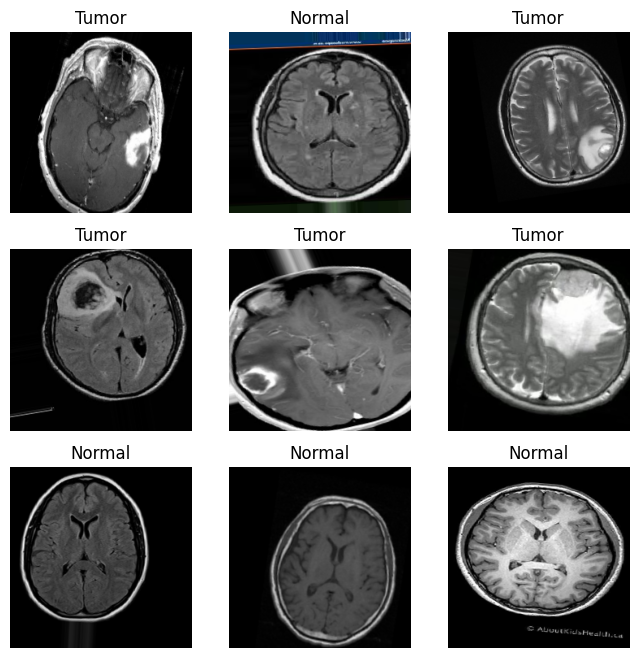

In [10]:
images, labels = next(train_data)

plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title("Tumor" if labels[i] else "Normal")
    plt.axis("off")

plt.show()